<a href="https://colab.research.google.com/github/mbbau/K-Means_analysis_of_structural_elments/blob/main/Manzana_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Cluster analysis of structural elements

# Introducción

El presente trabajo pretende realizar un análisis comparativo de la calidad del hormigón presente en los tabiques que componen las estructuras de 5 pisos diferentes del edificio de ******, mediante la utilizacion de esclerometrias y ultrasonidos. Los ensayos utilizados se efectuaron en dos alturas distintas a lo largo de cada tabique para obtener un panorama en dos dimensiones de las posibles variaciones presentes en cada elemento, como asi tambien posibles diferencias entre los distintos tabiques.
Debido a la falta de medios para realizar una calibracion confiable, se utilizaran los ensayos no destructivos con fines comparativos, es decir no con el proposito de correlacionar sus resultados a un valor de resistencia, sino con el fin de agrupar los elementos estructurales en clusters de similares caracteristicas.



# Presentación de resultados

Cada ensayo ha sido designado por el piso al cual pertenece, el numero de tabique al que corresponde, y un numero de ensayo. Este numero de ensayo fue asignado por orden iniciando con el valor uno a 0,80 metros de la base tomando como inicio al punto mas cercano a la calle libertad. Las tandas de puntos se dividen en dos, estando la segunda tanda a 0,8 metros por encima de la primera tanda. En cada tabique se han realizado cantidades variables de ensayos en funcion de la accesibilidad.
En lo que respecta al ensayo de ultrasonido, solo se tomaran en cuenta los resultados de las mediciones directas debido a que existió en el campo una gran variabilidad entre las mediciones directas, semi directas e indirectas, y siguiendo las recomendaciones establecidas en la bibliografia [1] [2], se considerará como confiables unicamente a las mediciones directas.


[1] HandBook on Nondestructive testing of Concrete - V.M. Malhotra, M.J. Carino - Second Edition (2004) - CRC Press LLC.

[2] Non-destructive Assessment of concrete Structures: Reliability and Limits of Single and Combined Techniques - Denys Breysse - Tilem technical Committee 207-INR - RILEM (2012). 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
esclerometrias = pd.read_excel("Datos de ensayos.xlsx", sheet_name = "Esclerometrias")

In [3]:
esclerometrias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ensayo                   284 non-null    int64  
 1   Piso                     284 non-null    object 
 2   Tabique                  284 non-null    int64  
 3   Punto                    284 non-null    int64  
 4   Posición                 284 non-null    object 
 5   Designacion              284 non-null    object 
 6   1                        284 non-null    int64  
 7   2                        284 non-null    int64  
 8   3                        284 non-null    int64  
 9   4                        284 non-null    int64  
 10  5                        284 non-null    int64  
 11  6                        284 non-null    int64  
 12  7                        284 non-null    int64  
 13  8                        284 non-null    int64  
 14  9                        2

In [4]:
esclerometrias.head()

,Ensayo,Piso,Tabique,Punto,Posición,Designacion,1,2,3,4,5,6,7,8,9,Media,Lecturas Válidas,Media lect válidas,Coef. Corr. Ángulo,Coef. Corr. Calibracion,Índice escler.,Verificación de valores,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,1,PB,5,1,Abajo,PB-5-1,46,42,42,41,43,42,42,42,42,42.444444,9,42.444444,0,0,42.444444,46,42,42,41,43,42,42,42,42
1,2,PB,5,2,Abajo,PB-5-2,45,38,42,44,36,36,45,46,36,40.888889,8,40.250000,0,0,40.250000,45,38,42,44,36,36,45,0,36
2,3,PB,5,3,Abajo,PB-5-3,40,43,43,38,42,42,42,42,39,41.222222,9,41.222222,0,0,41.222222,40,43,43,38,42,42,42,42,39
3,4,PB,5,4,Abajo,PB-5-4,46,46,47,44,40,46,50,45,45,45.444444,8,46.125000,0,0,46.125000,46,46,47,44,0,46,50,45,45
4,5,PB,5,5,Abajo,PB-5-5,40,46,40,42,44,45,49,43,46,43.888889,8,43.250000,0,0,43.250000,40,46,40,42,44,45,0,43,46


In [5]:
esclerometrias["Lecturas Válidas"].describe()

count    284.000000
mean       8.577465
std        0.731173
min        5.000000
25%        8.000000
50%        9.000000
75%        9.000000
max        9.000000
Name: Lecturas Válidas, dtype: float64

In [6]:
esclerometrias["Índice escler."].describe(percentiles = [.1, .5, .9])

count    284.000000
mean      45.967804
std        3.842278
min       29.857143
10%       41.444444
50%       46.222222
90%       50.666667
max       54.125000
Name: Índice escler., dtype: float64

In [7]:
ultrasonidos = pd.read_excel("Datos de ensayos.xlsx", sheet_name= "Ultrasonido")

In [8]:
ultrasonidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ensayo       184 non-null    int64  
 1   Piso         184 non-null    object 
 2   Tabique      184 non-null    object 
 3   Punto        184 non-null    int64  
 4   Posición     184 non-null    object 
 5   Designacion  184 non-null    object 
 6   Tiempo       184 non-null    float64
 7   Espesor      184 non-null    float64
 8   Velocidad    184 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 13.1+ KB


In [9]:
ultrasonidos.head()

,Ensayo,Piso,Tabique,Punto,Posición,Designacion,Tiempo,Espesor,Velocidad
0,1,PB,5,1,Abajo,PB-5-1,133.6,0.500,3742.514970
1,2,PB,5,3,Abajo,PB-5-3,92.9,0.350,3767.491927
2,3,PB,5,4,Abajo,PB-5-4,90.8,0.359,3953.744493
3,4,PB,5,5,Abajo,PB-5-5,94.8,0.355,3744.725738
4,5,PB,5,6,Abajo,PB-5-6,98.0,0.355,3622.448980


In [10]:
ultrasonidos.Velocidad.describe()

count     184.000000
mean     3823.449858
std       234.418160
min      2155.963303
25%      3734.329951
50%      3830.809391
75%      3930.277218
max      4393.673111
Name: Velocidad, dtype: float64

Como puede observarse en los detalles de los ensayos, se tienen 284 ensayos de esclerometrías y 157 de ultrasonidos. Esto se debe, como se explicó anteriormente, al hecho de que en varios sectores fue imposible realizar mediciones directas con el ultrasonido y que los otros tipos de mediciones (semi directas e indirectas) presentaban valores erráticos (hasta 1500 metros por segundo de diferencia) en los sectores donde se realizaron verificaciones para contrastar.

Para realizar el análisis comparativo, cada tabique quedará definido por cuatro parámetros, que vendrán en función de las mediciones realizadas:



1.   Promedio de los índices esclerométricos obtenidos en dicho tabique;
2.   Desvío estándar de los índices esclerométricos obtenidos;
3.   Promedio de las velocidades obtenidas por el ensayo de ultrasonido;
4.   Desvío estándar asociado a las velocidades.



In [11]:
indices_esclerometricos = esclerometrias[["Designacion", "Índice escler."]]
indices_esclerometricos

,Designacion,Índice escler.
0,PB-5-1,42.444444
1,PB-5-2,40.250000
2,PB-5-3,41.222222
3,PB-5-4,46.125000
4,PB-5-5,43.250000
...,...,...
279,3SS-8-6,46.222222
280,3SS-8-7,45.555556
281,3SS-8-8,43.888889
282,3SS-8-9,40.888889


In [12]:
velocidades = ultrasonidos[["Designacion", "Velocidad"]]
velocidades.head()

,Designacion,Velocidad
0,PB-5-1,3742.514970
1,PB-5-3,3767.491927
2,PB-5-4,3953.744493
3,PB-5-5,3744.725738
4,PB-5-6,3622.448980


In [13]:
ensayos_completos = pd.merge(indices_esclerometricos, velocidades, how="left")
ensayos_completos

,Designacion,Índice escler.,Velocidad
0,PB-5-1,42.444444,3742.514970
1,PB-5-2,40.250000,NaN
2,PB-5-3,41.222222,3767.491927
3,PB-5-4,46.125000,3953.744493
4,PB-5-5,43.250000,3744.725738
...,...,...,...
279,3SS-8-6,46.222222,3659.259259
280,3SS-8-7,45.555556,NaN
281,3SS-8-8,43.888889,NaN
282,3SS-8-9,40.888889,NaN


In [14]:
pisos_y_tabiques = esclerometrias[["Piso", "Tabique", "Designacion"]]
pisos_y_tabiques

,Piso,Tabique,Designacion
0,PB,5,PB-5-1
1,PB,5,PB-5-2
2,PB,5,PB-5-3
3,PB,5,PB-5-4
4,PB,5,PB-5-5
...,...,...,...
279,3SS,8,3SS-8-6
280,3SS,8,3SS-8-7
281,3SS,8,3SS-8-8
282,3SS,8,3SS-8-9


In [15]:
ensayos_completos = pd.merge(pisos_y_tabiques, ensayos_completos)
ensayos_completos

,Piso,Tabique,Designacion,Índice escler.,Velocidad
0,PB,5,PB-5-1,42.444444,3742.514970
1,PB,5,PB-5-2,40.250000,NaN
2,PB,5,PB-5-3,41.222222,3767.491927
3,PB,5,PB-5-4,46.125000,3953.744493
4,PB,5,PB-5-5,43.250000,3744.725738
...,...,...,...,...,...
279,3SS,8,3SS-8-6,46.222222,3659.259259
280,3SS,8,3SS-8-7,45.555556,NaN
281,3SS,8,3SS-8-8,43.888889,NaN
282,3SS,8,3SS-8-9,40.888889,NaN


In [16]:
parametros_por_elemento = ensayos_completos.groupby(["Piso", "Tabique"]).agg({"Índice escler.": [np.mean, np.std], "Velocidad": [np.mean, np.std]})


In [17]:
parametros_por_elemento

Índice escler.              Velocidad            
                       mean       std         mean         std
Piso Tabique                                                  
1SS  1            46.703125  1.822372  3900.603373   54.203870
     2            48.155903  2.384756  3750.825856  114.883940
     4            47.614286  1.708156  3824.893120   63.833894
     5            48.194444  2.607004  3956.454681   63.755376
     7            45.747222  2.530734  3802.405773   27.797542
     8            46.911111  1.907893  4081.269055  239.812006
2SS  1            49.652778  1.486491  3714.244179   76.794364
     2            48.699653  1.667426  3707.037931   66.066150
     4            44.041667  0.499185  3769.186902   62.571630
     5            43.611111  3.946226  3915.593691  123.201239
     7            48.620833  2.295531  3955.610093   26.659622
     8            48.458333  1.481887  3844.586224  190.228488
3SS  1            42.473958  1.349571  3311.134562   18.755613
     2            46.353423  1.405552  3621.209699   74.761516
     4            47.918254  1.641586  3998.808938  109.880015
     5            51.987500  1.757668  4212.468790  139.334253
     7            45.457143  1.654316  3881.770686  103.305787
     8            42.802976  2.015356  3772.861646   81.758189
PB   1            49.109375  2.086234  3860.335311   64.531973
     2            34.528274  3.353428  3254.599917  600.693286
     4            44.427414  2.147229  4079.981427   93.127053
     5            43.589120  1.901007  3789.188112  116.071083
     7            42.159557  1.922799  3692.778603  164.361077
     8            44.651786  3.165636  3808.788967   70.865996
PP   1            48.354167  1.427856  3749.066576   46.838333
     2            48.888889  2.478879  4041.764267  268.070097
     4            49.545833  2.836388  3869.584787   97.065163
     5            47.480556  3.194567  3774.556296  106.802593
     7            41.901389  0.630053  3714.817394  102.920113
     8            44.405556  1.171357  3814.436747  100.168500

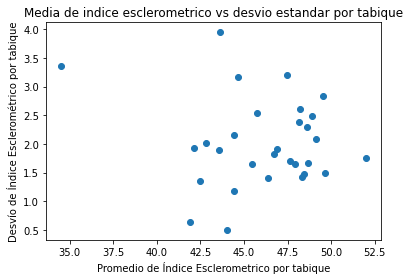

In [18]:
plt.scatter(parametros_por_elemento["Índice escler.", "mean"], parametros_por_elemento["Índice escler.", "std"])
plt.xlabel("Promedio de Índice Esclerometrico por tabique")
plt.ylabel("Desvío de Índice Esclerométrico por tabique")
plt.title("Media de indice esclerometrico vs desvio estandar por tabique")
plt.show()


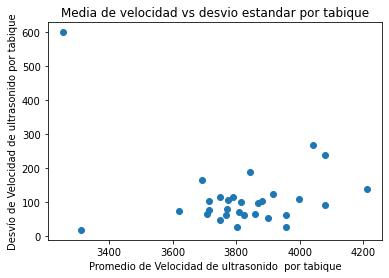

In [19]:

plt.scatter(parametros_por_elemento["Velocidad", "mean"], parametros_por_elemento["Velocidad", "std"])
plt.xlabel("Promedio de Velocidad de ultrasonido  por tabique")
plt.ylabel("Desvío de Velocidad de ultrasonido por tabique")
plt.title("Media de velocidad vs desvio estandar por tabique")
plt.show()

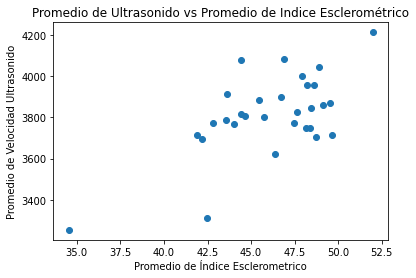

In [20]:
plt.scatter(parametros_por_elemento["Índice escler.", "mean"], parametros_por_elemento["Velocidad", "mean"])
plt.xlabel("Promedio de Índice Esclerometrico")
plt.ylabel("Promedio de Velocidad Ultrasonido")
plt.title("Promedio de Ultrasonido vs Promedio de Indice Esclerométrico")
plt.show()



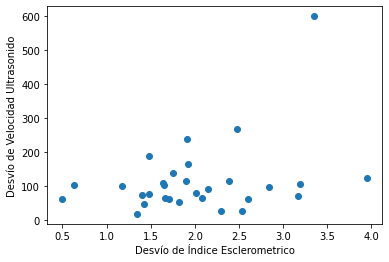

In [21]:
plt.scatter(parametros_por_elemento["Índice escler.", "std"], parametros_por_elemento["Velocidad", "std"])
plt.xlabel("Desvío de Índice Esclerometrico")
plt.ylabel("Desvío de Velocidad Ultrasonido")
plt.show()

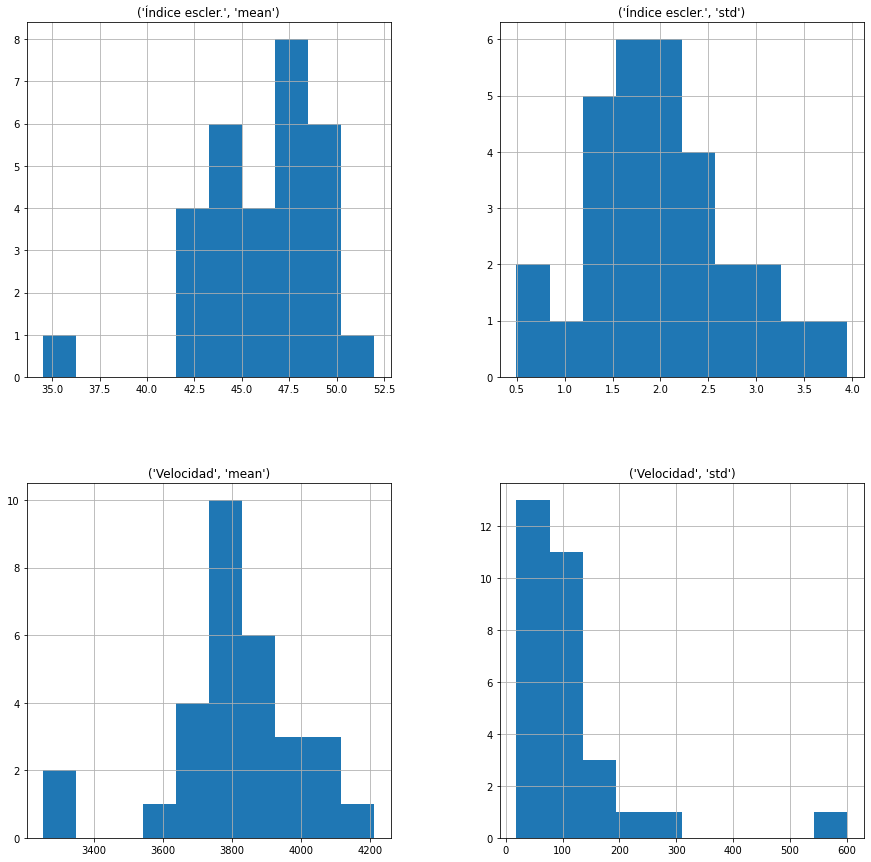

In [22]:
histogramas = parametros_por_elemento.hist(bins=10, figsize=(15,15))

# Análisis de resultados

## Clustering

Una vez obtenidos los parámetros que describen cada elemento estructural, se buscará encontrar patrones que permitan establecer grupos de comportamientos similares. Para ello, se utilizaran dos algoritmos distintos, y se analizaran los resultados de cada uno de ellos. Estos algoritmos serán:



1.   K-Means Clustering;
2.   Hierarchical Clustering.



### K-Means Clustering

El algoritmo K-Means busca encontrar centroides que sean representativos de cierto sector de la informacion recolectada, con el fin de detectar patrones de comportamiento y establecer grupos con caracteristicas similares (clusters).El algoritmo itera entre dos pasos: asignar cada punto de los datos al centroide mas cercano y luego reubicar dicho centroide hacia el promedio de los puntos asignados a el. Las iteraciones finalizan cuando la ubicacion del centroide no cambia entre una instancia y la siguiente.

In [23]:
X = parametros_por_elemento.iloc[:,:].values
X

array([[4.67031250e+01, 1.82237190e+00, 3.90060337e+03, 5.42038704e+01],
       [4.81559028e+01, 2.38475576e+00, 3.75082586e+03, 1.14883940e+02],
       [4.76142857e+01, 1.70815581e+00, 3.82489312e+03, 6.38338942e+01],
       [4.81944444e+01, 2.60700360e+00, 3.95645468e+03, 6.37553757e+01],
       [4.57472222e+01, 2.53073359e+00, 3.80240577e+03, 2.77975418e+01],
       [4.69111111e+01, 1.90789278e+00, 4.08126906e+03, 2.39812006e+02],
       [4.96527778e+01, 1.48649120e+00, 3.71424418e+03, 7.67943639e+01],
       [4.86996528e+01, 1.66742604e+00, 3.70703793e+03, 6.60661500e+01],
       [4.40416667e+01, 4.99184864e-01, 3.76918690e+03, 6.25716297e+01],
       [4.36111111e+01, 3.94622634e+00, 3.91559369e+03, 1.23201239e+02],
       [4.86208333e+01, 2.29553125e+00, 3.95561009e+03, 2.66596224e+01],
       [4.84583333e+01, 1.48188652e+00, 3.84458622e+03, 1.90228488e+02],
       [4.24739583e+01, 1.34957121e+00, 3.31113456e+03, 1.87556131e+01],
       [4.63534226e+01, 1.40555215e+00, 3.62120970e

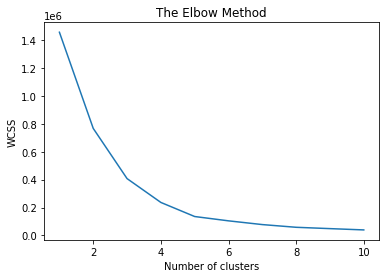

In [24]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [26]:
y_kmeans

array([0, 3, 3, 0, 3, 4, 3, 3, 3, 0, 0, 0, 1, 3, 0, 4, 0, 3, 0, 2, 4, 3,
       3, 3, 3, 4, 0, 3, 3, 3], dtype=int32)

In [27]:
y_kmeans.shape

(30,)

In [28]:
X.shape

(30, 4)

In [29]:
Clusters = pd.Series(y_kmeans)  
parametros_clusterizados_kMeans = parametros_por_elemento
parametros_clusterizados_kMeans["Clusters"] = Clusters.values

In [30]:
parametros_clusterizados_kMeans

Índice escler.              Velocidad             Clusters
                       mean       std         mean         std         
Piso Tabique                                                           
1SS  1            46.703125  1.822372  3900.603373   54.203870        0
     2            48.155903  2.384756  3750.825856  114.883940        3
     4            47.614286  1.708156  3824.893120   63.833894        3
     5            48.194444  2.607004  3956.454681   63.755376        0
     7            45.747222  2.530734  3802.405773   27.797542        3
     8            46.911111  1.907893  4081.269055  239.812006        4
2SS  1            49.652778  1.486491  3714.244179   76.794364        3
     2            48.699653  1.667426  3707.037931   66.066150        3
     4            44.041667  0.499185  3769.186902   62.571630        3
     5            43.611111  3.946226  3915.593691  123.201239        0
     7            48.620833  2.295531  3955.610093   26.659622        0
     8            48.458333  1.481887  3844.586224  190.228488        0
3SS  1            42.473958  1.349571  3311.134562   18.755613        1
     2            46.353423  1.405552  3621.209699   74.761516        3
     4            47.918254  1.641586  3998.808938  109.880015        0
     5            51.987500  1.757668  4212.468790  139.334253        4
     7            45.457143  1.654316  3881.770686  103.305787        0
     8            42.802976  2.015356  3772.861646   81.758189        3
PB   1            49.109375  2.086234  3860.335311   64.531973        0
     2            34.528274  3.353428  3254.599917  600.693286        2
     4            44.427414  2.147229  4079.981427   93.127053        4
     5            43.589120  1.901007  3789.188112  116.071083        3
     7            42.159557  1.922799  3692.778603  164.361077        3
     8            44.651786  3.165636  3808.788967   70.865996        3
PP   1            48.354167  1.427856  3749.066576   46.838333        3
     2            48.888889  2.478879  4041.764267  268.070097        4
     4            49.545833  2.836388  3869.584787   97.065163        0
     5            47.480556  3.194567  3774.556296  106.802593        3
     7            41.901389  0.630053  3714.817394  102.920113        3
     8            44.405556  1.171357  3814.436747  100.168500        3

### Hierarchical Clustering

El algoritmo de hierarchical clustering plantea un enfoque inverso al de K-Means. Inicialmente se toma a cada punto como un cluster para luego ir reduciendo el numero de clusters en iteraciones que plantean agrupar los clusters mas cercanos entre si en cada iteracion hasta que todo el conjunto de elementos sea solo uno. Mediante la utilizacion de un herramienta grafica denominada dendograma puede observarse el proceso utilizado de agrupacion y el número óptimo de clusters.

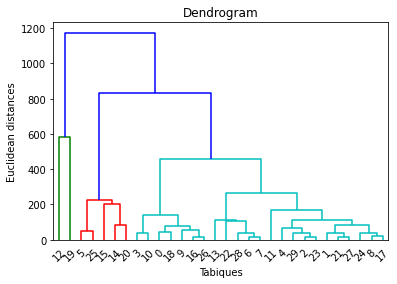

In [31]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Tabiques')
plt.ylabel('Euclidean distances')
plt.show()

In [32]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [33]:
y_hc

array([1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 3, 0, 2, 2, 1, 0, 1, 4, 2, 0,
       0, 0, 0, 2, 1, 0, 0, 0])

In [34]:
y_hc.shape

(30,)

In [35]:
Clusters_metodo_alternativo = pd.Series(y_hc)
parametros_clusterizados = parametros_clusterizados_kMeans.copy()
parametros_clusterizados["Clusters Segundo Método"] = Clusters_metodo_alternativo.values
parametros_clusterizados

Índice escler.            ... Clusters Clusters Segundo Método
                       mean       std  ...                                 
Piso Tabique                           ...                                 
1SS  1            46.703125  1.822372  ...        0                       1
     2            48.155903  2.384756  ...        3                       0
     4            47.614286  1.708156  ...        3                       0
     5            48.194444  2.607004  ...        0                       1
     7            45.747222  2.530734  ...        3                       0
     8            46.911111  1.907893  ...        4                       2
2SS  1            49.652778  1.486491  ...        3                       0
     2            48.699653  1.667426  ...        3                       0
     4            44.041667  0.499185  ...        3                       0
     5            43.611111  3.946226  ...        0                       1
     7            48.620833  2.295531  ...        0                       1
     8            48.458333  1.481887  ...        0                       0
3SS  1            42.473958  1.349571  ...        1                       3
     2            46.353423  1.405552  ...        3                       0
     4            47.918254  1.641586  ...        0                       2
     5            51.987500  1.757668  ...        4                       2
     7            45.457143  1.654316  ...        0                       1
     8            42.802976  2.015356  ...        3                       0
PB   1            49.109375  2.086234  ...        0                       1
     2            34.528274  3.353428  ...        2                       4
     4            44.427414  2.147229  ...        4                       2
     5            43.589120  1.901007  ...        3                       0
     7            42.159557  1.922799  ...        3                       0
     8            44.651786  3.165636  ...        3                       0
PP   1            48.354167  1.427856  ...        3                       0
     2            48.888889  2.478879  ...        4                       2
     4            49.545833  2.836388  ...        0                       1
     5            47.480556  3.194567  ...        3                       0
     7            41.901389  0.630053  ...        3                       0
     8            44.405556  1.171357  ...        3                       0

[30 rows x 6 columns]

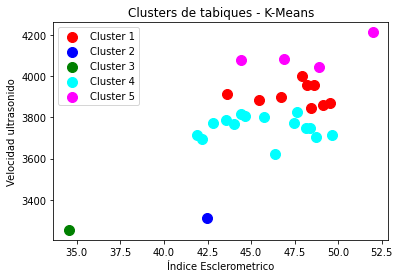

In [36]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 2], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 2], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters de tabiques - K-Means')
plt.xlabel('Índice Esclerometrico')
plt.ylabel('Velocidad ultrasonido')
plt.legend()
plt.show()


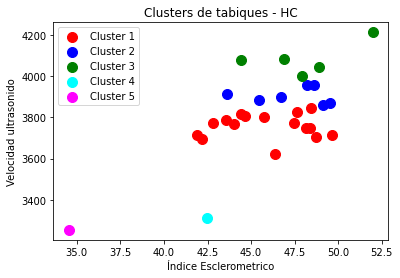

In [37]:

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 2], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 2], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters de tabiques - HC')
plt.xlabel('Índice Esclerometrico')
plt.ylabel('Velocidad ultrasonido')
plt.legend()
plt.show()

Como se puede apreciar, los dos métodos de clusterización seleccionados arrojaron las mismas concluciones, las cuales pueden resumirse como:


1.   Existen 5 grupos de tabiques bien diferenciados en función de los parámetros utilizados para caracterizar cada elemento;
2.   Dentro del analisis total, dos de los clusters establecidos poseian un unico elemento cada uno, denotando un comportamiento atipico en dichos elementos. 

Haciendo uso de la clusterizacion establecida por el metodo K-Means, se hará un analisis mas exaustivo de cada cluster a continuacion.



## Análisis individual por cluster

En esta instancia, se analizará por separado cada cluster establecido anteriormente con el fin de caracterizar el comportamiento de cada uno.

In [38]:
detalles_de_clusters = parametros_clusterizados_kMeans.groupby(parametros_clusterizados_kMeans["Clusters"])
detalles_de_clusters.mean()

Índice escler.              Velocidad             Clusters
                   mean       std         mean         std         
Clusters                                                           
0             47.513161  2.263505  3909.260865   92.536837        0
1             42.473958  1.349571  3311.134562   18.755613        1
2             34.528274  3.353428  3254.599917  600.693286        2
3             45.707336  1.807395  3753.753187   85.099661        3
4             48.053729  2.072917  4103.870885  185.085852        4

In [39]:
detalles_de_clusters.size()

Clusters
0     9
1     1
2     1
3    15
4     4
dtype: int64

Como se puede apreciar, el proceso de clusterizacion dio como resultado la existencia de 5 grupos diferentes.

In [40]:
cluster_0 = detalles_de_clusters.get_group(0)
cluster_1 = detalles_de_clusters.get_group(1)
cluster_2 = detalles_de_clusters.get_group(2)
cluster_3 = detalles_de_clusters.get_group(3)
cluster_4 = detalles_de_clusters.get_group(4)

### Cluster 0

In [41]:
cluster_0

Índice escler.              Velocidad             Clusters
                       mean       std         mean         std         
Piso Tabique                                                           
1SS  1            46.703125  1.822372  3900.603373   54.203870        0
     5            48.194444  2.607004  3956.454681   63.755376        0
2SS  5            43.611111  3.946226  3915.593691  123.201239        0
     7            48.620833  2.295531  3955.610093   26.659622        0
     8            48.458333  1.481887  3844.586224  190.228488        0
3SS  4            47.918254  1.641586  3998.808938  109.880015        0
     7            45.457143  1.654316  3881.770686  103.305787        0
PB   1            49.109375  2.086234  3860.335311   64.531973        0
PP   4            49.545833  2.836388  3869.584787   97.065163        0

In [42]:
cluster_0.mean()

Índice escler.  mean      47.513161
                std        2.263505
Velocidad       mean    3909.260865
                std       92.536837
Clusters                   0.000000
dtype: float64

### Cluster 1

In [43]:
cluster_1

Índice escler.              Velocidad            Clusters
                       mean       std         mean        std         
Piso Tabique                                                          
3SS  1            42.473958  1.349571  3311.134562  18.755613        1

In [44]:
cluster_1.mean()

Índice escler.  mean      42.473958
                std        1.349571
Velocidad       mean    3311.134562
                std       18.755613
Clusters                   1.000000
dtype: float64

### Cluster 2

In [45]:
cluster_2

Índice escler.              Velocidad             Clusters
                       mean       std         mean         std         
Piso Tabique                                                           
PB   2            34.528274  3.353428  3254.599917  600.693286        2

In [46]:
cluster_2.mean()

Índice escler.  mean      34.528274
                std        3.353428
Velocidad       mean    3254.599917
                std      600.693286
Clusters                   2.000000
dtype: float64

### Cluster 3

In [47]:
cluster_3

Índice escler.              Velocidad             Clusters
                       mean       std         mean         std         
Piso Tabique                                                           
1SS  2            48.155903  2.384756  3750.825856  114.883940        3
     4            47.614286  1.708156  3824.893120   63.833894        3
     7            45.747222  2.530734  3802.405773   27.797542        3
2SS  1            49.652778  1.486491  3714.244179   76.794364        3
     2            48.699653  1.667426  3707.037931   66.066150        3
     4            44.041667  0.499185  3769.186902   62.571630        3
3SS  2            46.353423  1.405552  3621.209699   74.761516        3
     8            42.802976  2.015356  3772.861646   81.758189        3
PB   5            43.589120  1.901007  3789.188112  116.071083        3
     7            42.159557  1.922799  3692.778603  164.361077        3
     8            44.651786  3.165636  3808.788967   70.865996        3
PP   1            48.354167  1.427856  3749.066576   46.838333        3
     5            47.480556  3.194567  3774.556296  106.802593        3
     7            41.901389  0.630053  3714.817394  102.920113        3
     8            44.405556  1.171357  3814.436747  100.168500        3

In [48]:
cluster_3.mean()

Índice escler.  mean      45.707336
                std        1.807395
Velocidad       mean    3753.753187
                std       85.099661
Clusters                   3.000000
dtype: float64

### Cluster 4

In [49]:
cluster_4

Índice escler.              Velocidad             Clusters
                       mean       std         mean         std         
Piso Tabique                                                           
1SS  8            46.911111  1.907893  4081.269055  239.812006        4
3SS  5            51.987500  1.757668  4212.468790  139.334253        4
PB   4            44.427414  2.147229  4079.981427   93.127053        4
PP   2            48.888889  2.478879  4041.764267  268.070097        4

In [50]:
cluster_4.mean()

Índice escler.  mean      48.053729
                std        2.072917
Velocidad       mean    4103.870885
                std      185.085852
Clusters                   4.000000
dtype: float64

Como puede apreciarse, hay un marcado comportamiento que define a cada uno de los grupos. 
La recomendacion bibliografica establece (ver imagen) algunos rangos para poder definir la calidad del hormigon en funcion del pulso ultrasónico. En función de estas recomendaciones es que se puede considerar al hormigon de los grupos 0, 3 y 4 como de buena calidad mientras que los grupos 2 y 1 quedan comprendidos en "regular a dudosa". 


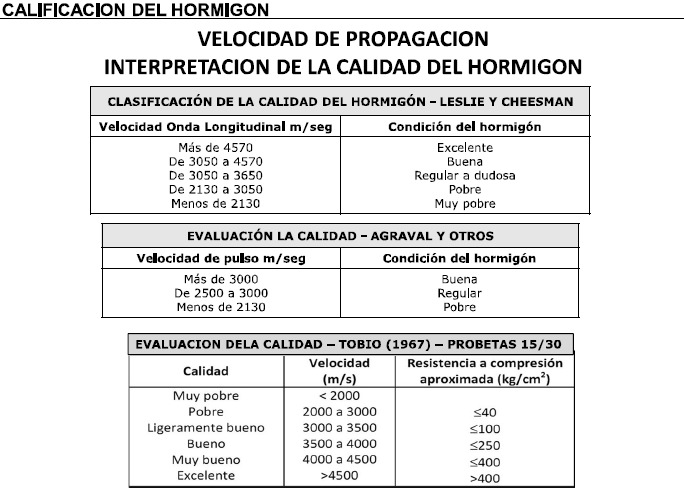

En lo que respecta al índice esclerometrico, puede observarse como los grupos 0, 3 y 4 se mantienen en rangos similares cercanos a 46 mientras que el resto de los grupos se encuentra por debajo (estando el grupo 2 muy por debajo).

# Tabiques deficientes

Puede observar en el proceso anterior que existen dos clusters que se comportan completamente diferente a los demas. Estos cluster son el 1 y el 2. A continuación se detallan las carateristicas de cada uno.

In [51]:
tabiques_anomalos = cluster_1.append(cluster_2)
tabiques_anomalos

Índice escler.              Velocidad             Clusters
                       mean       std         mean         std         
Piso Tabique                                                           
3SS  1            42.473958  1.349571  3311.134562   18.755613        1
PB   2            34.528274  3.353428  3254.599917  600.693286        2

### Tabique 2 Planta Baja

En lo que respecta al Tabique 2 de Planta Baja puede observarse que el resultado de los ensayos arrojó valores bajos, en comparacion con los demás resultados, en las dos clases de medición. 

En lo que respecta al promedio de la esclerometria, este tabique tuvo el resultado más bajo de todos los elementos estructurales ensayados. El desvío que presento el indice esclerómetrico estuvo considerablemente por encima de la media (3,35), y en lo respecta a ensayos individuales, el mínimo fue de 30 en el punto 7 y el máximo de 40 en el punto 5. 

En lo que respecta al desvío asociado al ensayo de ultrasonido puede apreciarse que este tabique obtuvo el resultado más bajo de toda la estructura. El punto máximo fue de 3836 m/s en el punto 5 y el mínimo de 2156 m/s en el punto 7, en coincidencia con lo reflejado por el ensayo de esclerometría.

Todo esto permite afirmar que este tabique no esta completamente en disconformidad sino que presenta un comportamientos diferentes por sectores.


In [52]:

esclerometrias.columns

Index(['Ensayo', 'Piso', 'Tabique', 'Punto', 'Posición', 'Designacion', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', 'Media', 'Lecturas Válidas',
       'Media lect válidas', 'Coef. Corr. Ángulo', 'Coef. Corr. Calibracion',
       'Índice escler.', 'Verificación de valores', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'],
      dtype='object')

In [53]:
t2_pb = esclerometrias[esclerometrias.Piso == "PB"]
t2_pb = t2_pb[t2_pb.Tabique == 2]
t2_pb_us = ultrasonidos[ultrasonidos.Piso == "PB" ]
t2_pb_us = t2_pb_us[t2_pb_us.Tabique == 2]

In [54]:
puntos_t2_pb = t2_pb[["Punto", "Posición", "Índice escler."]]
puntos_t2_pb = puntos_t2_pb.set_index(["Punto", "Posición"])
puntos_t2_pb_us = t2_pb_us[["Punto", "Posición", "Velocidad"]]
puntos_t2_pb_us = puntos_t2_pb_us.set_index(["Punto", "Posición"])


In [55]:
t2 = puntos_t2_pb.to_numpy()
t2 = t2.reshape((2,4))
t2_us = puntos_t2_pb_us.to_numpy()
t2_us = t2_us.reshape((2,3))
print(t2)
print(t2_us)

[[37.88888889 34.         32.57142857 34.5       ]
 [40.25       35.44444444 29.85714286 31.71428571]]
[[3453.03867403 3010.33591731 3506.31136045]
 [3835.61643836 2155.96330275 3566.33380884]]


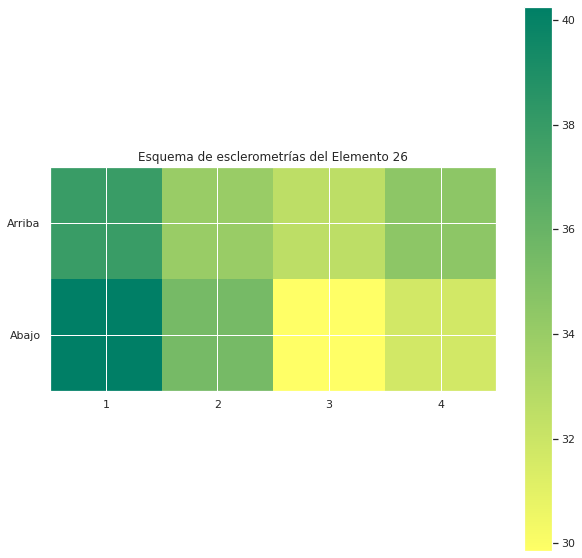

In [101]:
altura = ["Arriba", "Abajo"]
posicion = ["1", "2" , "3", "4"]
posicion_us = ["1", "2", "3"]

#posibles colores para elegir para el cmap: "viridis", "plasma", "inferno", "magma", "cividis".
#mas colores para elegir en este link: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.xticks(ticks=np.arange(len(posicion)),labels=posicion)
plt.yticks(ticks=np.arange(len(altura)),labels= altura)
plt.imshow(t2, cmap="summer_r",interpolation="nearest")
plt.title("Esquema de esclerometrías del Elemento 26")
plt.colorbar();

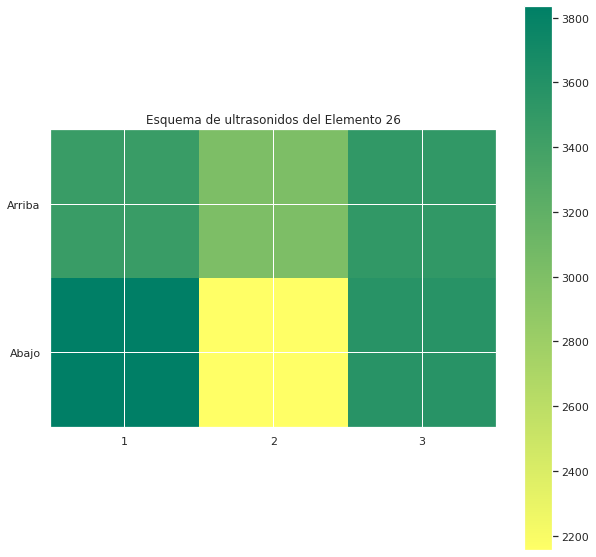

In [102]:
plt.xticks(ticks=np.arange(len(posicion_us)),labels=posicion)
plt.yticks(ticks=np.arange(len(altura)),labels= altura)
plt.imshow(t2_us, cmap="summer_r",interpolation="nearest")
plt.title("Esquema de ultrasonidos del Elemento 26")
plt.colorbar();

Las imagenes anterior son esquemas simplificados de los resultados obtenidos en las mediciones del tabique 2 de planta baja. El tabique presentaba una forma mas compleja que la del esquema.

En el gráfico de arriba puede observarse como las mediciones empeoran a lo largo del tabique. Esto puede deberse a varias cuestiones, pero la mas influyente son:

1.   Gran altura de colado que dificulta la compactación y fomenta la segregación (tabiques de 3 metros de altura con 25 centímetros de espesor);
2.   Demoras en la descarga acompañadas de perdida de asentamiento que también van en detrimento de una compactación adecuada.





### Tabique 1 Tercer Subsuelo

En lo que respecta al Tabique 1 del Tercer Subsuelo puede observarse que el resultado de los ensayos arrojó valores aceptables en lo que a la esclerometria concierne pero resultados bajos en los ultrasonidos. 

En lo que respecta al promedio de la esclerometria, este tabique tuvo un resultado 3 puntos por debajo del promedio del cluster más próximo (42.47 contra 45.70), teniendo este promedio de mediciones un comportamiento aceptable en lo que a este parámetro concierne.  estando por encima del valor minimo de dicho cluster. El desvío que presentó el índice esclerómetrico estuvo cerca de la media (1,13), y en lo respecta a ensayos individuales, el mínimo fue de 41 en los puntos 3 y 5, y el máximo de 45 en el punto 8. 

En lo que respecta los resultados obtenidos mediante el ultrasonido, el promedio estuvo cercano a lo obtenido en el tabique 2 de planta baja (3311 m/s) on un desvío relativamente bajo (esto puede deberse a la pequeña cantidad de puntos que pudieron ser medidos debido a la forma y la ubicacion del tabique) de 18 m/s. Las mediciones indirectas sobre este elemento fueron descartadas ya que en los sectores donde pudieron ser constatadas demostraban no ser mediciones confiables. 

Estos resultados demuestran que superficialmente este tabique se comporta de manera aproximadamente similar al resto de los tabiques de la estructura (salvo al tabique 2 de planta baja), siendo la medición de ultrasonido la que posee un comportamiento atípico indicando una posible disconformidad en el interior de la pieza.

In [58]:
t1_3ss = esclerometrias[esclerometrias.Piso == "3SS"]
t1_3ss = t1_3ss[t1_3ss.Tabique == 1]
t1_3ss_us = ultrasonidos[ultrasonidos.Piso == "3SS" ]
t1_3ss_us = t1_3ss_us[t1_3ss_us.Tabique == 1]

puntos_t1_3ss = t1_3ss[["Punto", "Posición", "Índice escler."]]
puntos_t1_3ss = puntos_t1_3ss.set_index(["Punto", "Posición"])

puntos_t1_3ss_us = t1_3ss_us[["Punto", "Posición", "Velocidad"]]
puntos_t1_3ss_us = puntos_t1_3ss_us.set_index(["Punto", "Posición"])

t1 = puntos_t1_3ss.to_numpy()
t1 = t1.reshape((2,4))
t1_us = puntos_t1_3ss_us.to_numpy()
t1_us = t1_us.reshape((2,1))

print(t1)
print(t1_us)



[[42.125      41.88888889 40.55555556 43.        ]
 [41.44444444 42.11111111 44.         44.66666667]]
[[3324.39678284]
 [3297.87234043]]


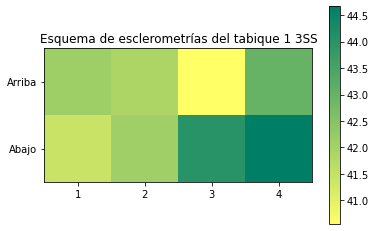

In [59]:

plt.xticks(ticks=np.arange(len(posicion)),labels=posicion)
plt.yticks(ticks=np.arange(len(altura)),labels= altura)
plt.imshow(t1, cmap="summer_r",interpolation="nearest")
plt.title("Esquema de esclerometrías del tabique 1 3SS")
plt.colorbar();

# Análisis de los resultados de testigos

In [60]:
testigos = pd.read_excel("Datos de ensayos.xlsx", sheet_name = "Testigos")

In [61]:
testigos.head()

,Ensayo,Piso,Tabique,Rotura
0,1,PB,4,31.7
1,2,PB,5,25.7
2,3,PB,5,31.7
3,4,PB,4,30.7
4,5,PB,7,20.4


In [62]:
testigos["Rotura"].describe(percentiles= [0.1, 0.5, 0.9])

count    150.000000
mean      33.804667
std        5.931322
min       20.400000
10%       25.890000
50%       33.800000
90%       41.160000
max       47.100000
Name: Rotura, dtype: float64

In [63]:
detalles_testigos = testigos.groupby(["Piso", "Tabique"]).agg({"Rotura": [np.mean, np.std]})
detalles_testigos.head()

Rotura          
                   mean       std
Piso Tabique                     
1SS  1        39.350000  1.484924
     2        41.400000  2.687006
     4        36.883333  3.438265
     5        39.400000  4.681453
     6        32.840000  2.561835

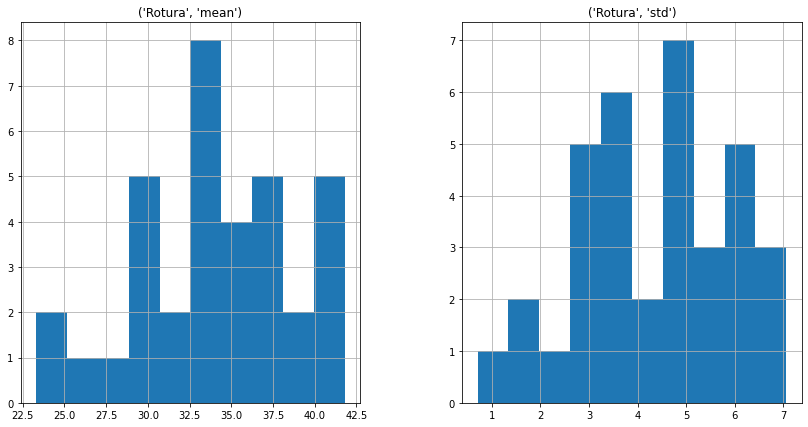

In [64]:
detalles_testigos.hist(figsize=(14,7));

Estos histogramas representan los promedios y desvios de cada tabique. Como puede apreciarse parece haber un desvio en las distribuciones que hace que tomen una forma atipica: una distribucion con mayor cantidades de desvios con valores altos lleva a una distribucion de roturas con mayor cantidades de resultados bajos. 

El desvío en estos resultados puede deberse a los siguientes facotes:

1. Variabilidad propia del hormigón;
2. Técnica constructiva;
3. Variabilidad propia de los métodos de ensayo para la obtención de estos ensayos (es decir el proceso de extranción y rotura de testigos aumenta la variabilidad de los resultados debido a la naturaleza misma de los procesos de muestreo y ensayo).

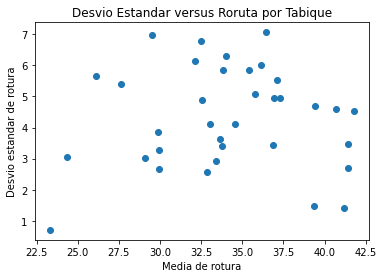

In [65]:
plt.scatter(detalles_testigos["Rotura", "mean"], detalles_testigos["Rotura", "std"])
plt.xlabel("Media de rotura")
plt.ylabel("Desvio estandar de rotura")
plt.title("Desvio Estandar versus Roruta por Tabique")
plt.show()

Como puede observarse en el gráfico anterior, la dispersión entre la relación que existe enter el promedio y el desvio presente en cada tabique es muy grande. 

### Nueva Clusterización

Tomando los datos iniciales de los ensayos no destructivos, ahora intentaremos asociar esa base de datos con las roturas de los testigos para establecer si esta actualización modifica los patrones encontrados anteriormente.

Para esto se actualizará cada tabique con la información obtenida por la extracción y rotura de testigos, es decir, se añadirá a cada tabique información adicional y se correrá nuevamente el algoritmo de K-Means.

In [66]:
parametros_por_elemento_actualizado = pd.merge(parametros_por_elemento, detalles_testigos, left_index= True, right_index= True)

In [67]:
del parametros_por_elemento_actualizado["Clusters"]

In [68]:
parametros_por_elemento_actualizado.head()

Índice escler.            ...     Rotura          
                       mean       std  ...       mean       std
Piso Tabique                           ...                     
1SS  1            46.703125  1.822372  ...  39.350000  1.484924
     2            48.155903  2.384756  ...  41.400000  2.687006
     4            47.614286  1.708156  ...  36.883333  3.438265
     5            48.194444  2.607004  ...  39.400000  4.681453
     7            45.747222  2.530734  ...  33.020000  4.120316

[5 rows x 6 columns]

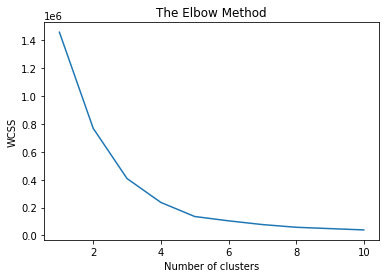

In [69]:
Xact = parametros_por_elemento_actualizado.iloc[:,:].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(Xact)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [70]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans_act = kmeans.fit_predict(Xact)

In [71]:
Clusters_act = pd.Series(y_kmeans_act)  
parametros_clusterizados_kMeans_actualizado = parametros_por_elemento_actualizado.copy()
parametros_clusterizados_kMeans_actualizado["Clusters"] = Clusters_act.values

In [72]:
parametros_clusterizados_kMeans_actualizado.head()

Índice escler.            ...    Rotura Clusters
                       mean       std  ...       std         
Piso Tabique                           ...                   
1SS  1            46.703125  1.822372  ...  1.484924        0
     2            48.155903  2.384756  ...  2.687006        3
     4            47.614286  1.708156  ...  3.438265        3
     5            48.194444  2.607004  ...  4.681453        0
     7            45.747222  2.530734  ...  4.120316        3

[5 rows x 7 columns]

In [73]:
columnas= ["Escl. mean", "Escl. std", "Vel. mean", "Vel. std", "Rot. mean", "Rot. std"]
df_completo = pd.DataFrame()
df_completo ["Escl. mean"] = parametros_por_elemento_actualizado["Índice escler.", "mean"].copy()
df_completo ["Escl. std"] = parametros_por_elemento_actualizado["Índice escler.", "std"].copy()
df_completo ["Vel. mean"] = parametros_por_elemento_actualizado["Velocidad", "mean"].copy()
df_completo ["Vel. std"] = parametros_por_elemento_actualizado["Velocidad", "std"].copy()
df_completo ["Rot. mean"] = parametros_por_elemento_actualizado["Rotura", "mean"].copy()
df_completo ["Rot. std"] = parametros_por_elemento_actualizado["Rotura", "std"].copy()
df_completo ["Clusters"] = parametros_clusterizados_kMeans_actualizado["Clusters"].copy()
df_completo.head()

Escl. mean  Escl. std    Vel. mean  ...  Rot. mean  Rot. std  Clusters
Piso Tabique                                      ...                               
1SS  1         46.703125   1.822372  3900.603373  ...  39.350000  1.484924         0
     2         48.155903   2.384756  3750.825856  ...  41.400000  2.687006         3
     4         47.614286   1.708156  3824.893120  ...  36.883333  3.438265         3
     5         48.194444   2.607004  3956.454681  ...  39.400000  4.681453         0
     7         45.747222   2.530734  3802.405773  ...  33.020000  4.120316         3

[5 rows x 7 columns]

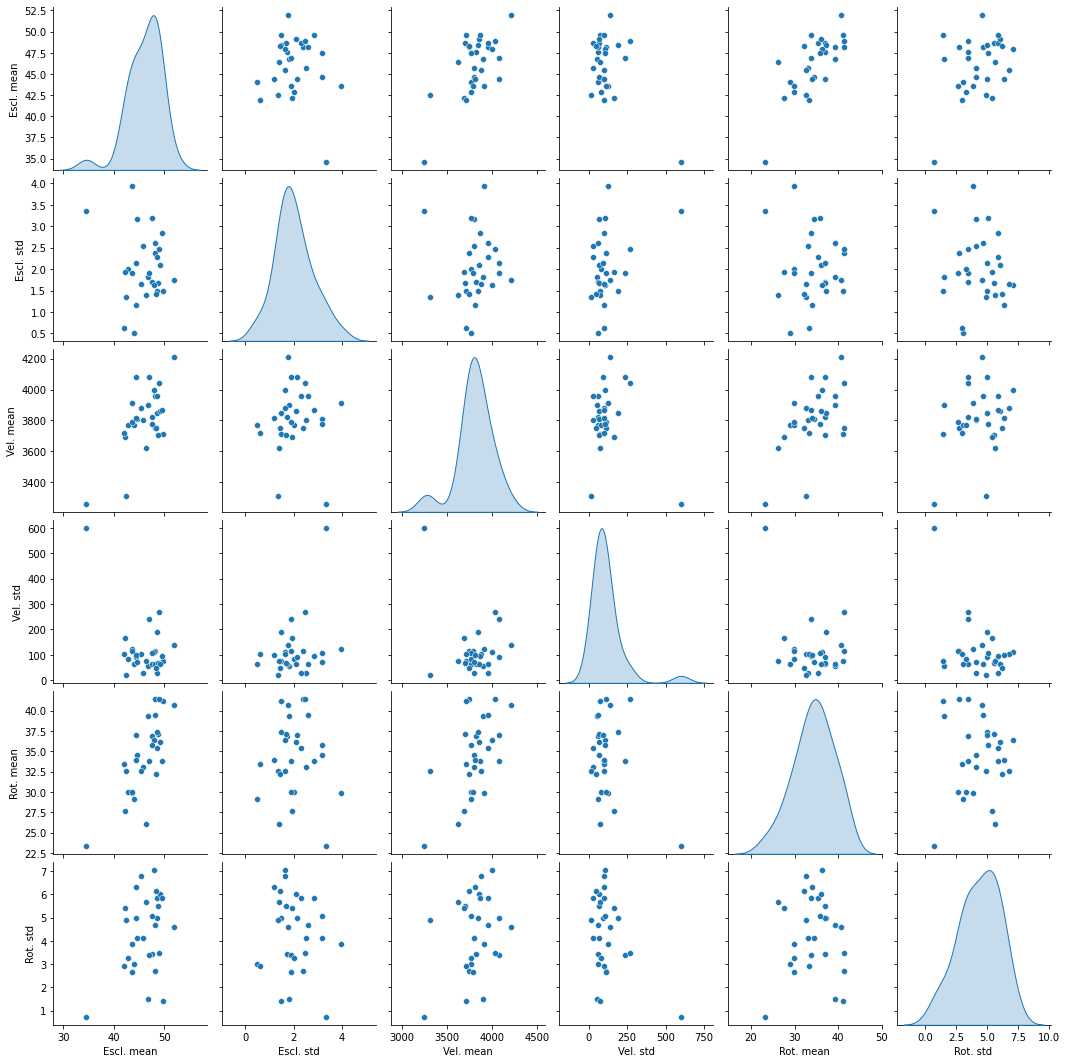

In [74]:
sns.pairplot(df_completo, vars = columnas, diag_kind= "kde");

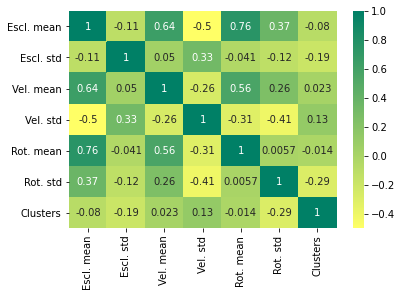

In [75]:
sns.heatmap(df_completo.corr(),  annot= True, cmap = "summer_r" );

In [76]:
detalles_de_clusters_actualizado = parametros_clusterizados_kMeans_actualizado.groupby(parametros_clusterizados_kMeans_actualizado["Clusters"])
detalles_de_clusters_actualizado.mean()

Índice escler.              Velocidad  ...     Rotura           Clusters
                   mean       std         mean  ...       mean       std         
Clusters                                        ...                              
0             47.513161  2.263505  3909.260865  ...  35.586481  5.170541        0
1             42.473958  1.349571  3311.134562  ...  32.550000  4.879037        1
2             34.528274  3.353428  3254.599917  ...  23.300000  0.707107        2
3             45.707336  1.807395  3753.753187  ...  33.477778  4.118995        3
4             48.053729  2.072917  4103.870885  ...  38.206667  4.107787        4

[5 rows x 7 columns]

In [77]:
detalles_de_clusters_actualizado = parametros_clusterizados_kMeans_actualizado.groupby(parametros_clusterizados_kMeans_actualizado["Clusters"])

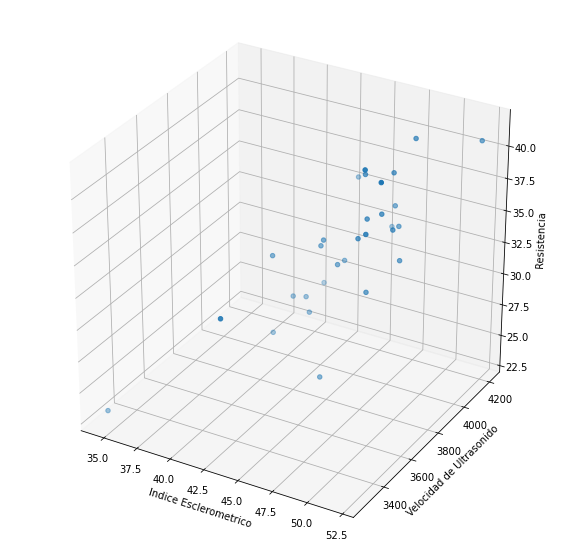

In [78]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot (111, projection= "3d")
sns.set(style = "darkgrid")
sns.set(rc={'figure.figsize':(10,10)})

x = parametros_clusterizados_kMeans_actualizado["Índice escler.", "mean"]
y = parametros_clusterizados_kMeans_actualizado["Velocidad", "mean"]
z = parametros_clusterizados_kMeans_actualizado["Rotura", "mean"]

ax.set_xlabel("Indice Esclerometrico")
ax.set_ylabel("Velocidad de Ultrasonido")
ax.set_zlabel("Resistencia")

ax.scatter(x, y, z)

plt.show()

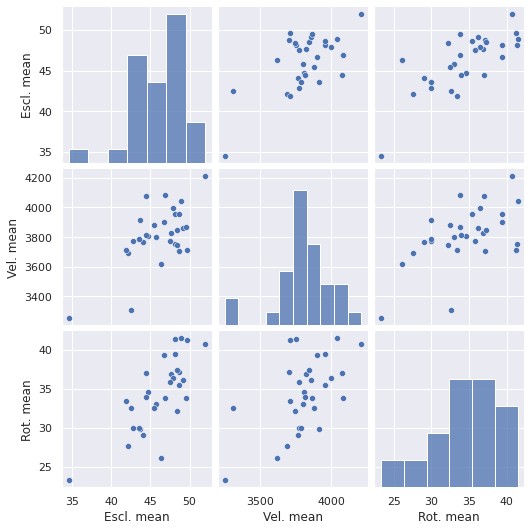

In [79]:
sns.pairplot(df_completo, vars= ["Escl. mean", "Vel. mean", "Rot. mean"]);

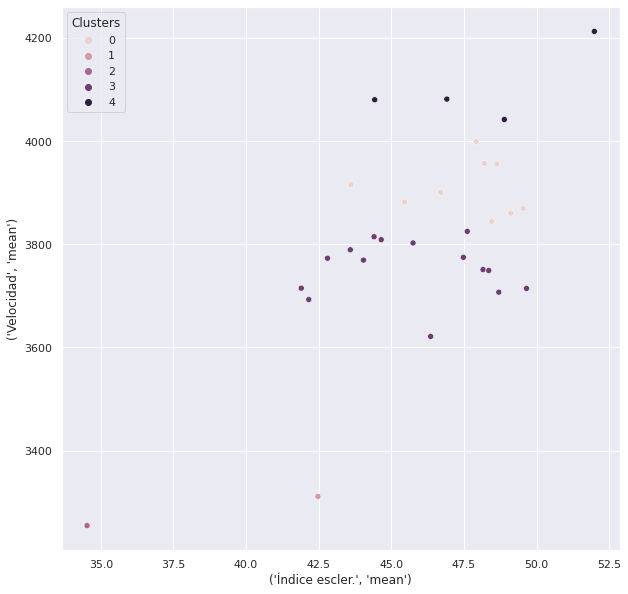

In [80]:
sns.scatterplot(x = parametros_clusterizados_kMeans_actualizado["Índice escler.", "mean"], y = parametros_clusterizados_kMeans_actualizado["Velocidad", "mean"], hue = parametros_clusterizados_kMeans_actualizado["Clusters"])

plt.show()

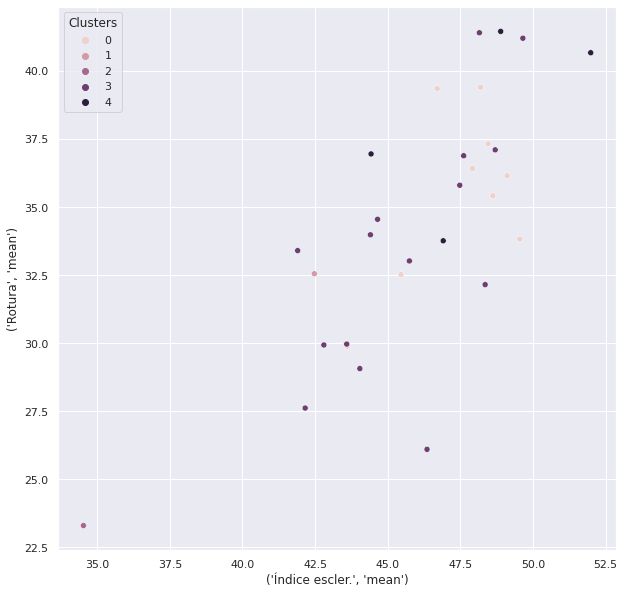

In [81]:
sns.scatterplot(x = parametros_clusterizados_kMeans_actualizado["Índice escler.", "mean"], y = parametros_clusterizados_kMeans_actualizado["Rotura", "mean"], hue = parametros_clusterizados_kMeans_actualizado["Clusters"])

plt.show()

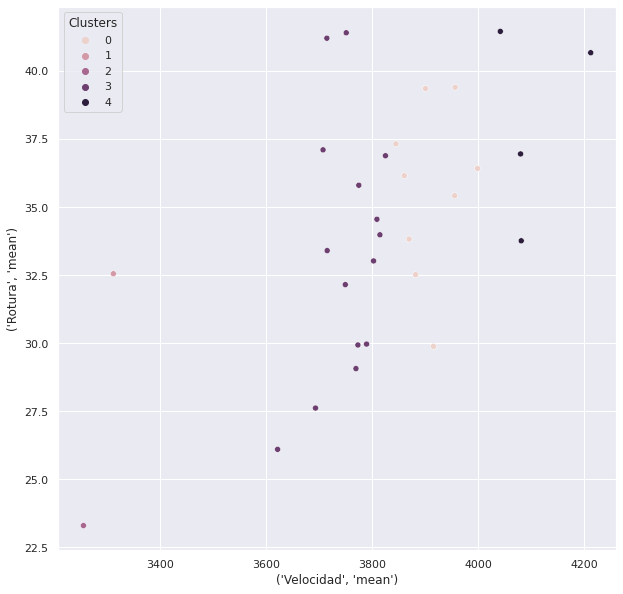

In [82]:
sns.scatterplot(x = parametros_clusterizados_kMeans_actualizado["Velocidad", "mean"], y = parametros_clusterizados_kMeans_actualizado["Rotura", "mean"], hue = parametros_clusterizados_kMeans_actualizado["Clusters"])
plt.show()

In [83]:
detalles_de_clusters_actualizado.get_group(0)

Índice escler.            ...    Rotura Clusters
                       mean       std  ...       std         
Piso Tabique                           ...                   
1SS  1            46.703125  1.822372  ...  1.484924        0
     5            48.194444  2.607004  ...  4.681453        0
2SS  5            43.611111  3.946226  ...  3.854045        0
     7            48.620833  2.295531  ...  5.847193        0
     8            48.458333  1.481887  ...  4.964575        0
3SS  4            47.918254  1.641586  ...  7.063545        0
     7            45.457143  1.654316  ...  6.773601        0
PB   1            49.109375  2.086234  ...  6.010408        0
PP   4            49.545833  2.836388  ...  5.855126        0

[9 rows x 7 columns]

In [84]:
detalles_de_clusters_actualizado.get_group(0).describe()

Índice escler.              Velocidad  ...     Rotura           Clusters
                mean       std         mean  ...       mean       std         
count       9.000000  9.000000     9.000000  ...   9.000000  9.000000      9.0
mean       47.513161  2.263505  3909.260865  ...  35.586481  5.170541      0.0
std         1.921508  0.780513    51.739542  ...   3.118496  1.709668      0.0
min        43.611111  1.481887  3844.586224  ...  29.883333  1.484924      0.0
25%        46.703125  1.654316  3869.584787  ...  33.825000  4.681453      0.0
50%        48.194444  2.086234  3900.603373  ...  36.150000  5.847193      0.0
75%        48.620833  2.607004  3955.610093  ...  37.320000  6.010408      0.0
max        49.545833  3.946226  3998.808938  ...  39.400000  7.063545      0.0

[8 rows x 7 columns]

In [85]:
detalles_de_clusters_actualizado.get_group(1)

Índice escler.              Velocidad  ... Rotura           Clusters
                       mean       std         mean  ...   mean       std         
Piso Tabique                                        ...                          
3SS  1            42.473958  1.349571  3311.134562  ...  32.55  4.879037        1

[1 rows x 7 columns]

In [86]:
detalles_de_clusters_actualizado.get_group(2)

Índice escler.              Velocidad  ... Rotura           Clusters
                       mean       std         mean  ...   mean       std         
Piso Tabique                                        ...                          
PB   2            34.528274  3.353428  3254.599917  ...   23.3  0.707107        2

[1 rows x 7 columns]

In [87]:
detalles_de_clusters_actualizado.get_group(3)

Índice escler.            ...    Rotura Clusters
                       mean       std  ...       std         
Piso Tabique                           ...                   
1SS  2            48.155903  2.384756  ...  2.687006        3
     4            47.614286  1.708156  ...  3.438265        3
     7            45.747222  2.530734  ...  4.120316        3
2SS  1            49.652778  1.486491  ...  1.414214        3
     2            48.699653  1.667426  ...  5.515433        3
     4            44.041667  0.499185  ...  3.026329        3
3SS  2            46.353423  1.405552  ...  5.656854        3
     8            42.802976  2.015356  ...  3.261084        3
PB   5            43.589120  1.901007  ...  2.671080        3
     7            42.159557  1.922799  ...  5.414948        3
     8            44.651786  3.165636  ...  4.113757        3
PP   1            48.354167  1.427856  ...  6.151829        3
     5            47.480556  3.194567  ...  5.066228        3
     7            41.901389  0.630053  ...  2.935132        3
     8            44.405556  1.171357  ...  6.312448        3

[15 rows x 7 columns]

In [88]:
detalles_de_clusters_actualizado.get_group(3).describe(percentiles= [0.10, 0.50, 0.75, 0.85])

Índice escler.               Velocidad  ...     Rotura            Clusters
                mean        std         mean  ...       mean        std         
count      15.000000  15.000000    15.000000  ...  15.000000  15.000000     15.0
mean       45.707336   1.807395  3753.753187  ...  33.477778   4.118995      3.0
std         2.539669   0.785175    55.424733  ...   4.543590   1.490283      0.0
min        41.901389   0.499185  3621.209699  ...  26.100000   1.414214      3.0
10%        42.416925   0.846575  3698.482334  ...  28.196667   2.677450      3.0
50%        45.747222   1.708156  3769.186902  ...  33.400000   4.113757      3.0
75%        47.885094   2.200056  3795.796943  ...  36.341667   5.465191      3.0
85%        48.334340   2.516136  3808.150647  ...  37.078333   5.642712      3.0
max        49.652778   3.194567  3824.893120  ...  41.400000   6.312448      3.0

[9 rows x 7 columns]

In [89]:
detalles_de_clusters_actualizado.get_group(4)

Índice escler.            ...    Rotura Clusters
                       mean       std  ...       std         
Piso Tabique                           ...                   
1SS  8            46.911111  1.907893  ...  3.413649        4
3SS  5            51.987500  1.757668  ...  4.588101        4
PB   4            44.427414  2.147229  ...  4.964575        4
PP   2            48.888889  2.478879  ...  3.464823        4

[4 rows x 7 columns]

In [90]:
detalles_de_clusters_actualizado.get_group(4).describe()

Índice escler.              Velocidad  ...     Rotura           Clusters
                mean       std         mean  ...       mean       std         
count       4.000000  4.000000     4.000000  ...   4.000000  4.000000      4.0
mean       48.053729  2.072917  4103.870885  ...  38.206667  4.107787      4.0
std         3.195193  0.314612    74.682184  ...   3.555412  0.787404      0.0
min        44.427414  1.757668  4041.764267  ...  33.760000  3.413649      4.0
25%        46.290187  1.870337  4070.427137  ...  36.152500  3.452030      4.0
50%        47.900000  2.027561  4080.625241  ...  38.808333  4.026462      4.0
75%        49.663542  2.230142  4114.068989  ...  40.862500  4.682219      4.0
max        51.987500  2.478879  4212.468790  ...  41.450000  4.964575      4.0

[8 rows x 7 columns]

In [91]:
relacion_desvios_promedios = pd.DataFrame()
relacion_desvios_promedios["Esclerometria"] = (parametros_clusterizados_kMeans_actualizado["Índice escler.", "std"])/(parametros_clusterizados_kMeans_actualizado["Índice escler.", "mean"])
relacion_desvios_promedios["Ultrasonido"] = (parametros_clusterizados_kMeans_actualizado["Velocidad", "std"])/(parametros_clusterizados_kMeans_actualizado["Velocidad", "mean"])
relacion_desvios_promedios["Testigos"] = (parametros_clusterizados_kMeans_actualizado["Rotura", "std"])/(parametros_clusterizados_kMeans_actualizado["Rotura", "mean"])
relacion_desvios_promedios.head()

Esclerometria  Ultrasonido  Testigos
Piso Tabique                                      
1SS  1             0.039020     0.013896  0.037736
     2             0.049522     0.030629  0.064904
     4             0.035875     0.016689  0.093220
     5             0.054093     0.016114  0.118819
     7             0.055320     0.007311  0.124782

In [92]:
relacion_desvios_promedios.describe()

,Esclerometria,Ultrasonido,Testigos
count,30.000000,30.000000,30.000000
mean,0.044205,0.030845,0.128130
std,0.018906,0.032268,0.051021
min,0.011334,0.005664,0.030348
25%,0.032283,0.016696,0.095194
50%,0.041576,0.023955,0.126876
75%,0.050409,0.030631,0.165972
max,0.097121,0.184567,0.216738


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18e4fd0150>,
      dtype=object)

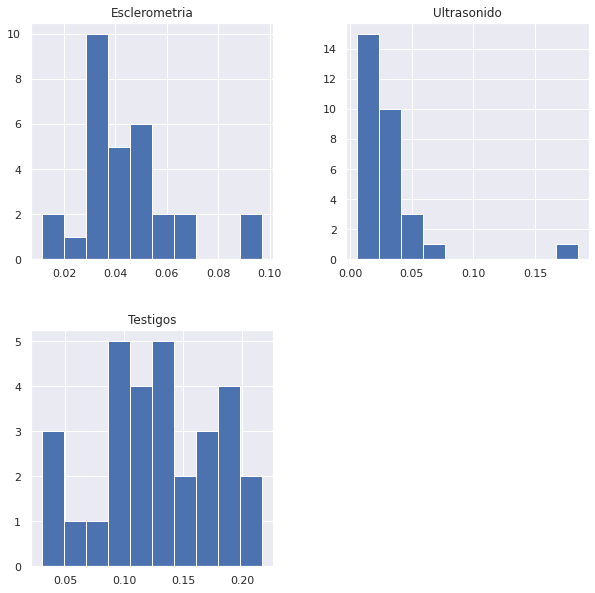

In [93]:
relacion_desvios_promedios.hist()

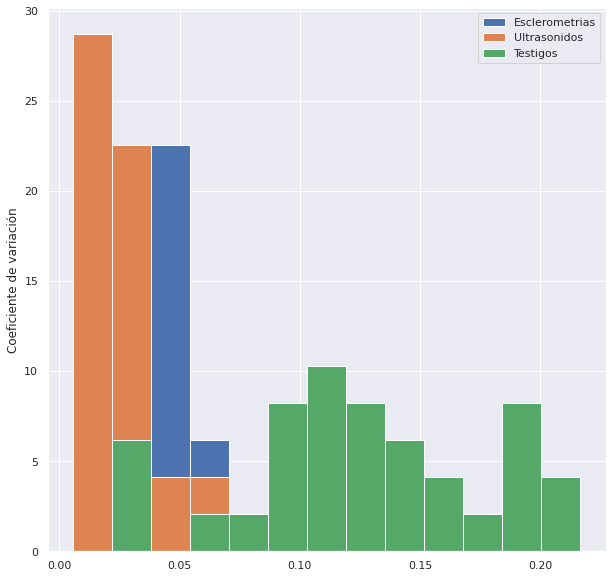

In [94]:
bins = np.linspace(min(relacion_desvios_promedios.Esclerometria.min(), relacion_desvios_promedios.Ultrasonido.min(), relacion_desvios_promedios.Testigos.min()),
                    max(relacion_desvios_promedios.Esclerometria.max(), relacion_desvios_promedios.Ultrasonido.max(), relacion_desvios_promedios.Testigos.max()),
                    14)
counts1, _, _ = plt.hist(relacion_desvios_promedios.Esclerometria, bins = bins, label= "Esclerometrias", density= True)
plt.hist(relacion_desvios_promedios.Ultrasonido, bins = bins, label= "Ultrasonidos", density= True)
plt.hist(relacion_desvios_promedios.Testigos, bins = bins, label= "Testigos", density= True)
plt.legend()
plt.ylabel("Coeficiente de variación")
plt.show()

Se puede observar que el desvío que caracteriza a cada tabique es mucho mayor en los datos obtenidos mediante la extracción de testigos. Esto se pone de manifiesto al relacionar el desvio vs el promedio de cada tabique, tal como puede apreciarse en los histogramas anteriores. El promedio porcentual de cada parámetro es:

1.   Esclerometría: 0.044205 
2.   Ultrasonido: 	0.030845	
3.   Testigos:      0.128130

Estos valores indican que la incertidumbre asociada a la extraccion de testigos es mucho mayor en comparación a los otros dos parametros en lo que respecta al promedio de las mediciones por elemento.

La distribucion normal asociada al error perteneciente a los testigos parece estar corrida hacia la derecha como lo indica el parametro de Skewness

# Analisis tabique 7 tercer subsuelo

In [95]:
t7_3ss = esclerometrias[esclerometrias.Piso == "3SS"]
t7_3ss = t7_3ss[t7_3ss.Tabique == 7]
t7_3ss_us = ultrasonidos[ultrasonidos.Piso == "3SS" ]
t7_3ss_us = t7_3ss_us[t7_3ss_us.Tabique == 7]

In [96]:

puntos_t7_3ss = t7_3ss[["Punto", "Posición", "Índice escler."]]
puntos_t7_3ss = puntos_t7_3ss.set_index(["Punto", "Posición"])
puntos_t7_3ss_us = t7_3ss_us[["Punto", "Posición", "Velocidad"]]
puntos_t7_3ss_us = puntos_t7_3ss_us.set_index(["Punto", "Posición"])


In [97]:
t7 = puntos_t7_3ss.to_numpy()
t7 = t7.reshape((2,5))
t7_us = puntos_t7_3ss_us.to_numpy()
t7_us = t7_us.reshape((2,2))
print(t7)
print(t7_us)

[[47.57142857 43.44444444 45.5        42.55555556 47.16666667]
 [45.44444444 45.88888889 44.         46.125      46.875     ]]
[[3857.47482572 4030.94462541]
 [3845.55984556 3793.10344828]]


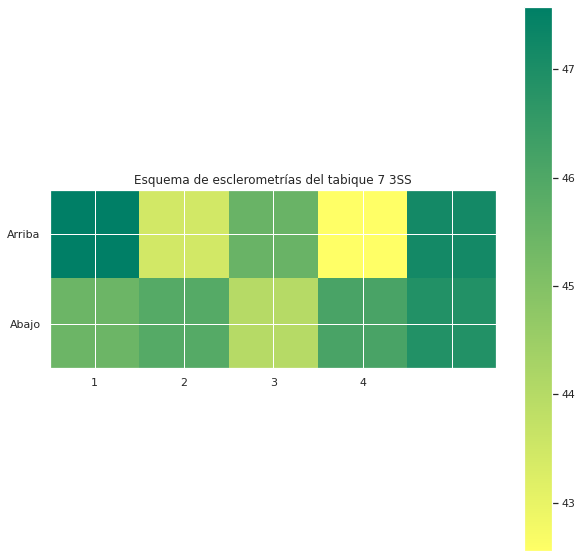

In [98]:
altura_7_3ss = ["Arriba", "Abajo"]
posicion_7_3ss = ["1", "2" , "3", "4", "5"]
posicion_us_7_3ss = ["1", "2"]

#posibles colores para elegir para el cmap: "viridis", "plasma", "inferno", "magma", "cividis".
#mas colores para elegir en este link: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.xticks(ticks=np.arange(len(posicion_7_3ss)),labels=posicion)
plt.yticks(ticks=np.arange(len(altura_7_3ss)),labels= altura)
plt.imshow(t7, cmap="summer_r",interpolation="nearest")
plt.title("Esquema de esclerometrías del tabique 7 3SS")
plt.colorbar();

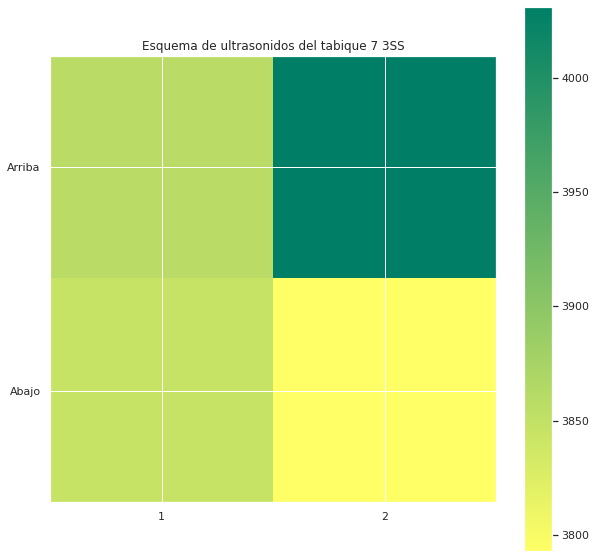

In [99]:
plt.xticks(ticks=np.arange(len(posicion_us_7_3ss)),labels=posicion)
plt.yticks(ticks=np.arange(len(altura_7_3ss)),labels= altura)
plt.imshow(t7_us, cmap="summer_r",interpolation="nearest")
plt.title("Esquema de ultrasonidos del tabique 7 3SS")
plt.colorbar();

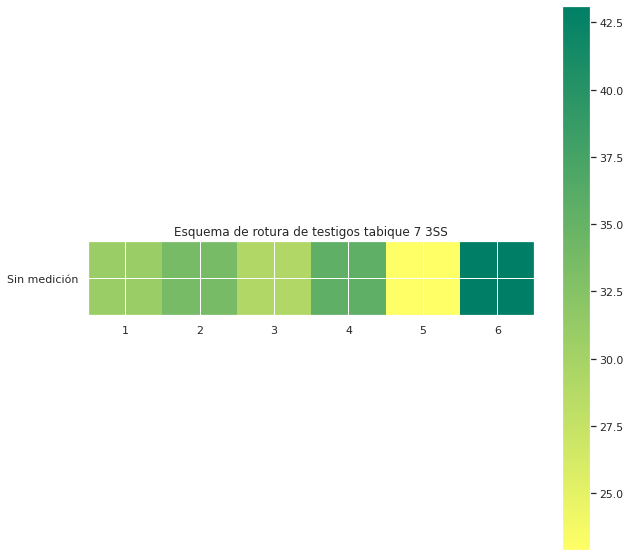

In [100]:

testigos_7_3ss = testigos[(testigos["Piso"] == "3SS") & (testigos["Tabique"] == 7)]
roturas_7_3ss = testigos_7_3ss["Rotura"].values.reshape((1,6))

posicion_roturas_7_3ss = ["1", "2", "3", "4", "5", "6"]
altura_posicion_roturas_7_3ss = ["Sin medición"]

plt.xticks(ticks=np.arange(len(posicion_roturas_7_3ss)), labels = posicion_roturas_7_3ss )
plt.yticks(ticks=np.arange(1), labels = altura_posicion_roturas_7_3ss)
plt.imshow(roturas_7_3ss, cmap="summer_r",interpolation="nearest")
plt.title("Esquema de rotura de testigos tabique 7 3SS")
plt.colorbar();